# 决策树
是一种树形结构，其中每个内部节点表示一个属性上的判断，每个分支代表一个判断结果的输出，最后每个叶节点代表一种分类结果，本质是一颗由多个判断节点组成的树。

## 熵
物理学上，熵(Entropy)是“混乱”程度的量度。

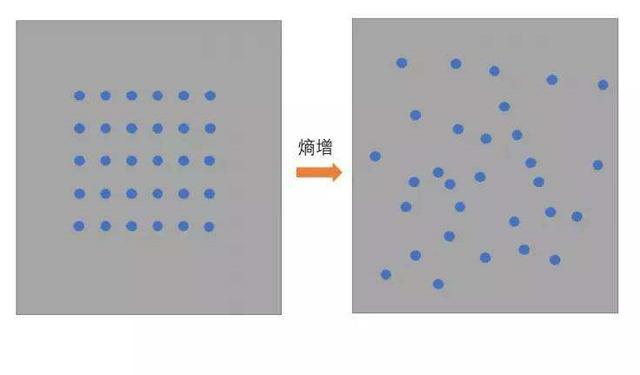

系统越有序，熵值越低；系统越混乱或者分散，熵值越高。

- 信息理论：
    - 1、从信息的完整性上进行的描述:
        - 当系统的有序状态一致时，数据越集中的地方熵值越小，数据越分散的地方熵值越大。
    - 2、从信息的有序性上进行的描述:
        - 当数据量一致时，系统越有序，熵值越低；系统越混乱或者分散，熵值越高。

### 信息熵(information entropy)
是度量样本集合纯度最常用的一种指标。
假定当前样本集合D中第k类样本所占的比例为$p_{k}(\mathrm{k}=1,2,\ldots,|y|)$,$p_k=\frac{C^k}D$, D为样本的所有数量,$C^k$为第k类样本的数量。

则D的信息熵定义为(log是以2为底，lg是以10为底):

$$Ent(D)=-\sum_{k=1}^n\frac{C^k}Dlog\frac{C^k}D=-\sum_{k=1}^np_klog_2p_k=-p_1log_2p_1-p_2log_2p_2-\ldots-p_nlog_2p_n$$

其中：$Ent(D)$的值越小，则$D$的纯度越高.

#### 案例
    假设我们没有看世界杯的比赛，但是想知道哪支球队会是冠军，我们只能猜测某支球队是或不是冠军，然后观众用对或不对来回答，我们想要猜测次数尽可能少，你会用什么方法？

答案：
二分法：
假如有 16 支球队，分别编号，先问是否在 1-8 之间，如果是就继续问是否在 1-4 之间，以此类推，直到最后判断出冠军球队是哪支。如果球队数量是 16，我们需要问 4 次来得到最后的答案。那么世界冠军这条消息的信息熵就是 4。

那么信息熵等于4，是如何进行计算的呢？

$$Ent(D) = -(p1 * logp1 + p2 * logp2 + ... + p16 * logp16)$$

其中 p1, ..., p16 分别是这 16 支球队夺冠的概率。

当每支球队夺冠概率相等都是 1/16 的时：$Ent(D) = -(16 * 1/16 * log1/16) = 4$

每个事件概率相同时，熵最大，这件事越不确定。

##### 随堂练习：

篮球比赛里，有4个球队 {A,B,C,D} ，获胜概率分别为{1/2, 1/4, 1/8, 1/8}

求Ent(D)

答案：

$$\begin{aligned}
Ent(D)& =-[\frac{1}{2}log_{2}(\frac{1}{2})+\frac{1}{4}log_{2}(\frac{1}{4})+\frac{1}{8}log_{2}(\frac{1}{8})+\frac{1}{8}log_{2}(\frac{1}{8})]  \\
&=\frac{1}{2}log_{2}2+\frac{1}{4}log_{2}4+\frac{1}{8}log_{2}8+\frac{1}{8}log_{2}8 \\
&=(\frac{1}{2}+\frac{1}{2}+\frac{3}{8}+\frac{3}{8})log_{2}2 \\
&=\frac{7}{4}
\end{aligned}$$

### 信息增益
使用划分前后集合熵的差值来衡量**使用当前特征对于样本集合D划分效果的好坏**。

信息增益 = entroy(前) - entroy(后)

    注：信息增益表示得知特征X的信息而使得类Y的信息熵减少的程度
    
定义为**集合D的信息熵Ent(D)与给定特征a条件下D的信息条件熵Ent(D∣a)之差**，即公式为：
$$Gain(D,a)=Ent(D)-Ent(D|a)=Ent(D)-\sum_{v=1}^{V}\frac{D^v}{D}Ent(D^v)$$

- 信息熵的计算：
$$Ent(D)=-\sum_{k=1}^n\frac{C^k}{D}log\frac{C^k}{D}$$

- 条件熵的计算：
$$Ent(D,a)=\sum_{v=1}^V\frac{D^v}{D}Ent(D^v)=-\sum_{v=1}^V\frac{D^v}{D}\sum_{k=1}^K\frac{C^{kv}}{D_v}log\frac{C^{kv}}{D_v}$$

    - 其中：$D^v$表示a属性中第v个分支节点包含的样本数,$C^{kv}$表示a属性中第v个分支节点包含的样本数中，第k个类别下包含的样本数
    
一般而言，信息增益越大，则意味着使用**属性 a 来进行划分所获得的"纯度提升"越大**。因此，我们可用信息增益来进行决策树的划分属性选择，著名的 ID3 决策树学习算法 [Quinlan， 1986] 就是以信息增益为准则来选择划分属性。

#### 案例
我们要解决一个问题：**性别和活跃度两个特征，哪个对用户流失影响更大？**

如下图，第一列为论坛号码，第二列为性别，第三列为活跃度，最后一列用户是否流失。

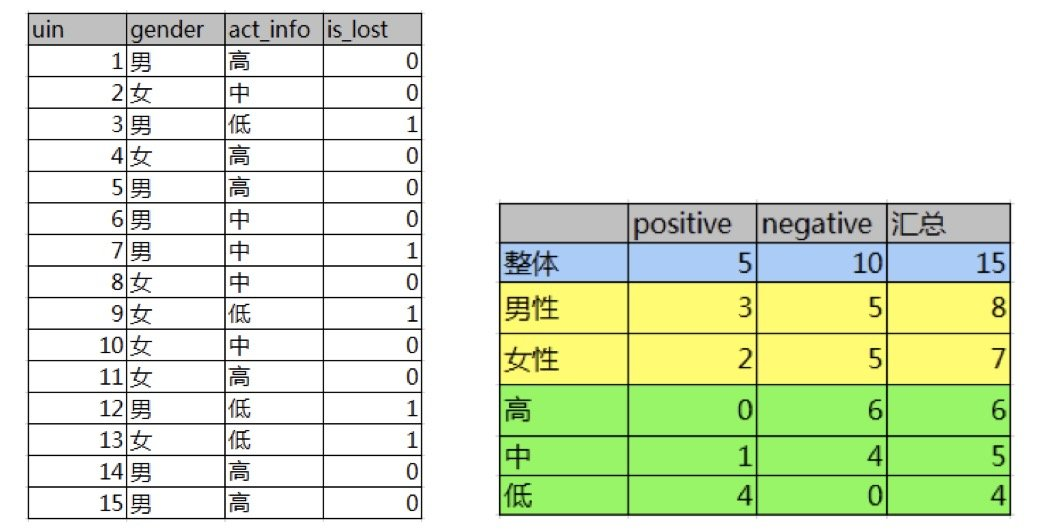

通过计算信息增益可以解决这个问题，统计上右表信息

其中Positive为正样本（已流失），Negative为负样本（未流失），下面的数值为不同划分下对应的人数。

可得到三个熵：

- 计算类别信息熵

    整体熵：
    $$Ent(D)=-\frac{5}{15}log_2(\frac{5}{15})-\frac{10}{15}log_2(\frac{10}{15})=0.9182$$
    
- 计算性别属性的信息熵(a="性别")
    $$\begin{gathered}
Ent(D,\text{性别})=\sum_{v=1}^{V}\frac{D^{v}}{D}Ent(D^{v})=\frac{D^{1}}{D}Ent(D^{1})+\frac{D^{2}}{D}Ent(D^{2}) \\
Ent(D^{1})=-\frac38log_{2}(\frac38)-\frac58log_{2}(\frac58)=0.9543 \\
Ent(D^{2})=-\frac{2}{7}log_{2}(\frac{2}{7})-\frac{5}{7}log_{2}(\frac{5}{7})=0.8631 
\end{gathered}$$

- 计算性别的信息增益(a="性别")
$$\begin{aligned}
Gain(D,\text{性别})& =Ent(D)-Ent(D|a)=Ent(D)-\sum_{v=1}^{V}\frac{D^{v}}DEnt(D^{v})  \\
&=Ent(D)-\frac{8}{15}Ent(D^{1})-\frac{7}{15}Ent(D^{2}) \\
&=0.0064
\end{aligned}$$

- 计算活跃度属性的信息熵(a="活跃度")
$$\begin{aligned}Ent(D^1)&=0\\Ent(D^2)&=0.7219\\Ent(D^3)&=0\end{aligned}$$

- 计算活跃度的信息增益(a="活跃度")
$$\begin{aligned}
Gain(D,\text{活跃度})& =Ent(D)-Ent(D|a)=Ent(D)-\sum_{v=1}^{V}\frac{D^{v}}DEnt(D^{v})  \\
&=Ent(D)-\frac{6}{15}Ent(D^{1})-\frac{5}{15}Ent(D^{2})-\frac{4}{15}Ent(D^{3}) \\
&=0.6776
\end{aligned}$$

**活跃度的信息增益比性别的信息增益大，也就是说，活跃度对用户流失的影响比性别大。**

### 信息增益率
**信息增益准则对可取值数目较多的属性有所偏好**，为减少这种偏好可能带来的不利影响，著名的 C4.5 决策树算法 [Quinlan， 1993J] **不直接使用信息增益，而是使用"增益率" (gain ratio) 来选择最优划分属性**.

**增益率**：增益率是用前面的信息增益Gain(D, a)和属性a对应的"固有值"(intrinsic value) [Quinlan , 1993J] 的比值来共同定义的。
$$Gain\_ratio(D,a)=\frac{Gain(D,a)}{IV(a)}$$
其中：
$$IV(a)=-\sum_{v=1}^{V}\frac{D^{v}}{D}log\frac{D^{v}}{D}$$

    属性 a 的可能取值数目越多(即 V 越大)，则 IV(a) 的值通常会越大.
    
#### 案例1

- 计算类别信息熵

- 计算性别属性的信息熵(性别、活跃度)

- 计算活跃度的信息增益(性别、活跃度)

- 计算属性分裂信息度量

信息增益率用信息增益/内在信息，会导致属性的重要性随着内在信息的增大而减小（也就是说，**如果这个属性本身不确定性就很大，那我就越不倾向于选取它**），这样算是对单纯用信息增益有所补偿。
$$\begin{aligned}
&\begin{aligned}IV(\text{性别})=-\frac{7}{15}log_2\frac{7}{15}-\frac{8}{15}log_2\frac{8}{15}=0.9968\end{aligned} \\
&\begin{aligned}IV(\text{活跃度})=-\frac6{15}log_2\frac6{15}-\frac5{15}log_2\frac5{15}-\frac4{15}log_2\frac4{15}=1.5656\end{aligned}
\end{aligned}$$

- 计算信息增益率
$$\begin{aligned}Gain\_ratio(D,\text{性别})=&\frac{Gain(D,\text{性别})}{IV(\text{性别})}=\frac{0.0064}{0.9968}=0.0064\\Gain\_ratio(D,\text{活跃度})=&\frac{0.6776}{1.5656}=0.4328\end{aligned}$$

活跃度的信息增益率更高一些，所以在构建决策树的时候，优先选择。

通过这种方式，在选取节点的过程中，我们可以降低取值较多的属性的选取偏好。

#### 案例2
我们要解决：**根据下面表格数据，判断在对应天气下，活动是否会进行？**

如下图，第一列为天气，第二列为温度，第三列为湿度，第四列为风速，最后一列该活动是否进行。

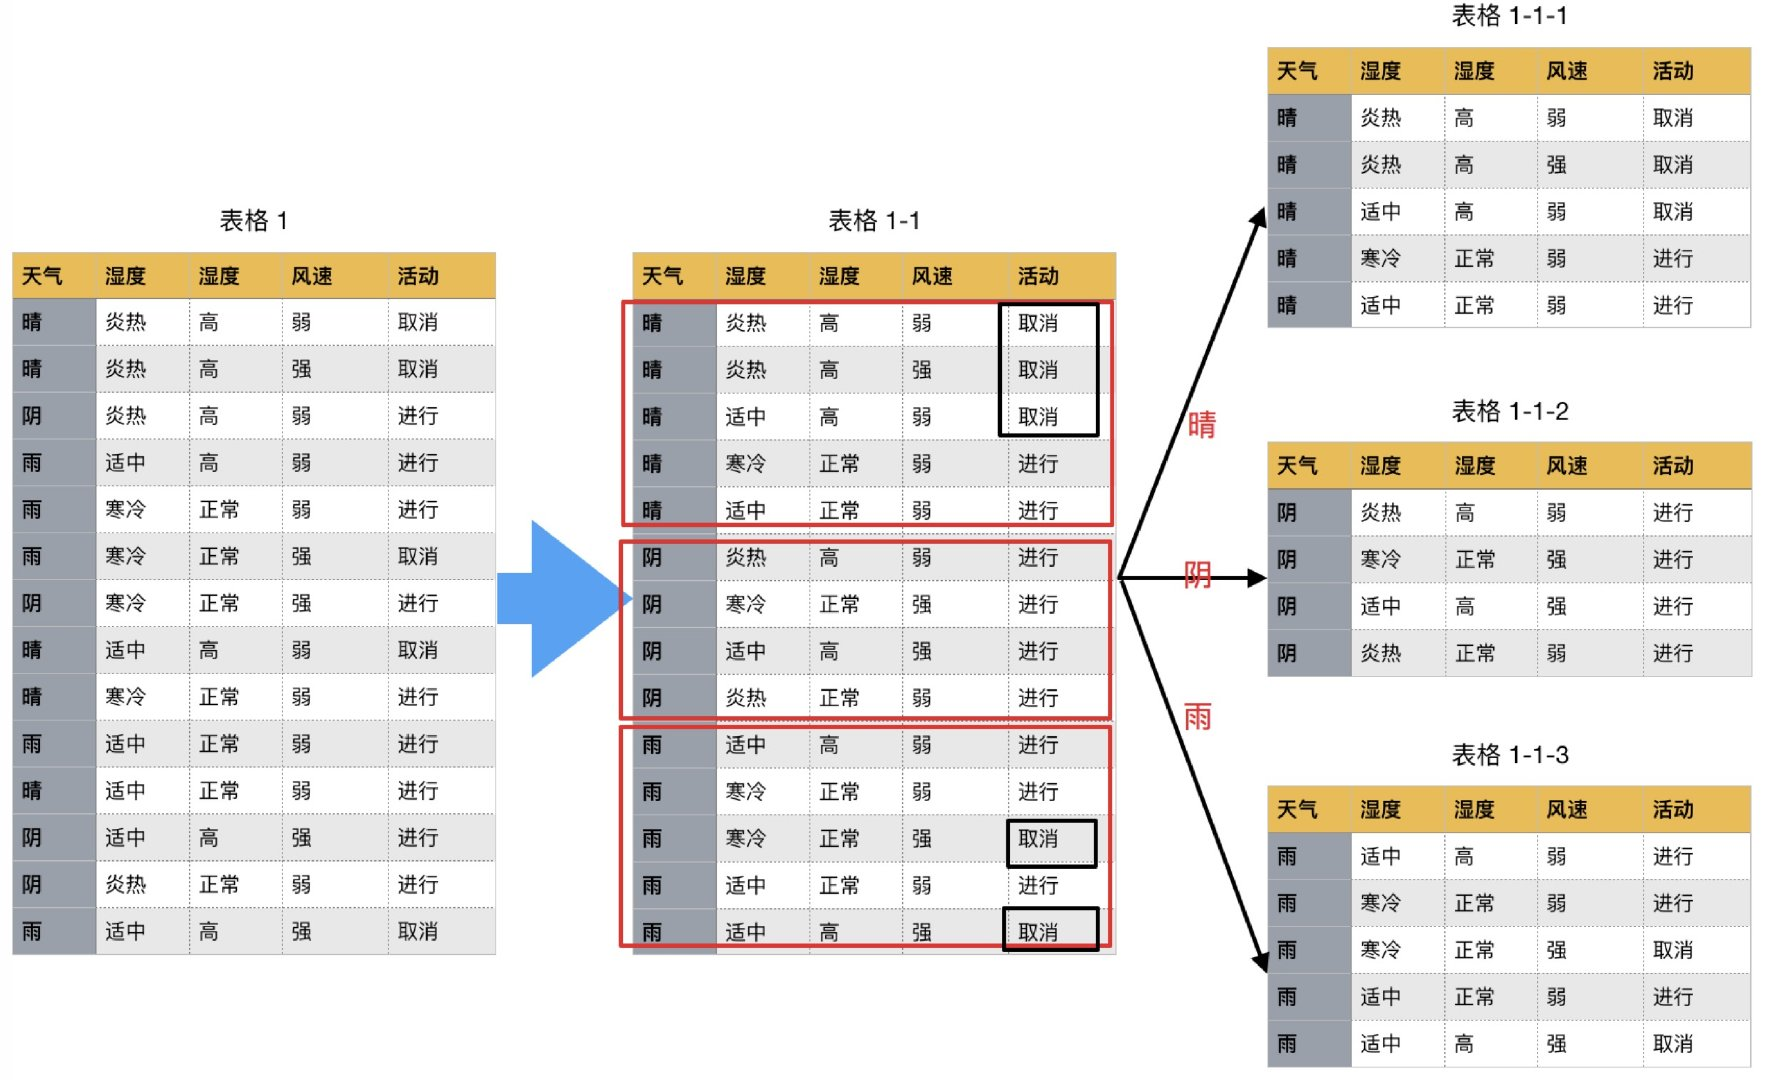
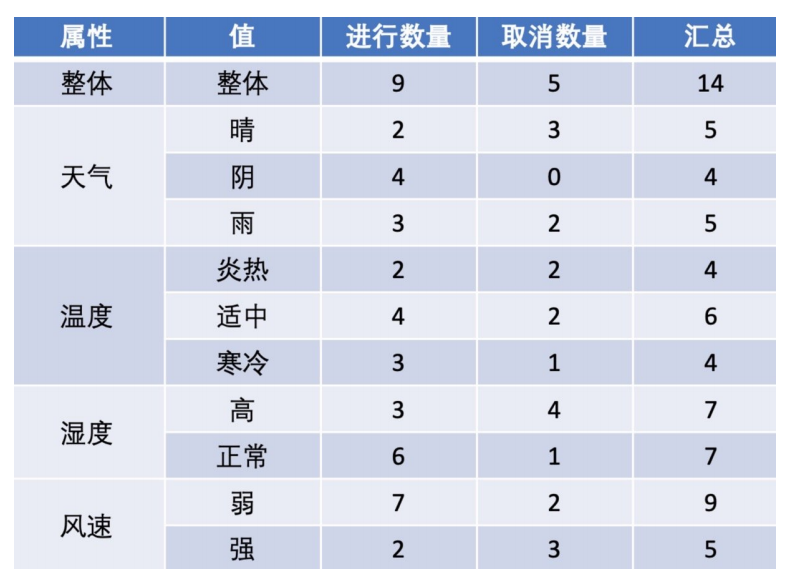

该数据集有四个属性，属性集合A={ 天气，温度，湿度，风速}， 类别标签有两个，类别集合L={进行，取消}。

- 计算类别信息熵
类别信息熵表示的是所有样本中各种类别出现的不确定性之和。根据熵的概念，熵越大，不确定性就越大，把事情搞清楚所需要的信息量就越多。
$$Ent(D)=-\frac{9}{14}log_2\frac{9}{14}-\frac{5}{14}log_2\frac{5}{14}=0.940$$

- 计算每个属性的信息熵

    a=“天气”(5个”晴”,4个"阴",5个”雨”)
    $$\begin{aligned}
Ent(D|a)& =\frac5{14}*[-\frac25log_2\frac25-\frac35log_2\frac35]+\frac4{14}*[-\frac44log_2\frac44]+\frac5{14}*[-\frac25log_2\frac25-\frac35log_2\frac35]  \\
&=0.694
\end{aligned}$$

    a温度”(4个"寒冷",6个"适中",4个“炎热")
    $$\begin{aligned}Ent(D|a)=&\frac4{14}*[-\frac24log_2\frac24-\frac24log_2\frac24]+\frac6{14}*[-\frac46log_2\frac46-\frac26log_2\frac26]+\frac4{14}*[-\frac34log_2\frac34-\frac14log_2\frac14]\\=&0.911\end{aligned}$$
    
    a="湿度"(7个"正常",7个"高")
    $$Ent(D|a)=0.789$$
    
    a=“风速”(9个”弱",5个“强)
    $$Ent(D|a)=0.838$$
    
- 计算信息增益
    $$\begin{gathered}
Gain(D,\text{天气})= 0.940-0.694=0.246 \\
Gain(D,\text{温度})= 0.940-0.911=0.029 \\
Gain(D,\text{湿度})= 0.940-0.789=0.15 \\
Gain(D,\text{风速})= 0.940-0.838=0.102 
\end{gathered}$$

- 计算属性分裂信息度量
    $$\begin{aligned}
&IV({\mathcal{\mp}}^{\text{气}}) =-\frac5{14}log_{2}\frac5{14}-\frac5{14}log_{2}\frac5{14}-\frac4{14}log_{2}\frac4{14}=1.577  \\
&IV(\text{温度}) =-\frac{4}{14}log_{2}\frac{4}{14}-\frac{6}{14}log_{2}\frac{6}{14}-\frac{4}{14}log_{2}\frac{4}{14}=1.556  \\
&IV(\text{湿度}) =-\frac{7}{14}log_2\frac{7}{14}-\frac{7}{14}log_2\frac{7}{14}=1.0 &   \\
&IV(\text{风速}) =-\frac9{14}log_{2}\frac9{14}-\frac5{14}log_{2}\frac5{14}=0.940 
\end{aligned}$$

- 计算信息增益率
    $$\begin{aligned}
&Gain\_ratio(D,\text{天气})= \frac{Gain(D,\text{天气})}{IV(\text{天气})}=\frac{0.246}{1.577}=0.156  \\
&Gain\_ratio(D,\text{温度})= \begin{aligned}\frac{0.026}{1.556}=0.0167\end{aligned}  \\
&Gain\_ratio(D,\text{温度})= \begin{aligned}\frac{0.151}{1.0}=0.151\end{aligned}  \\
&Gain\_ratio(D,\text{风速})= \begin{aligned}\frac{0.048}{0.940}=0.108\end{aligned} 
\end{aligned}$$

天气的信息增益率最高，选择天气为分裂属性。发现分裂了之后，天气是“阴”的条件下，类别是”纯“的，所以把它定义为叶子节点，选择不“纯”的结点继续分裂。
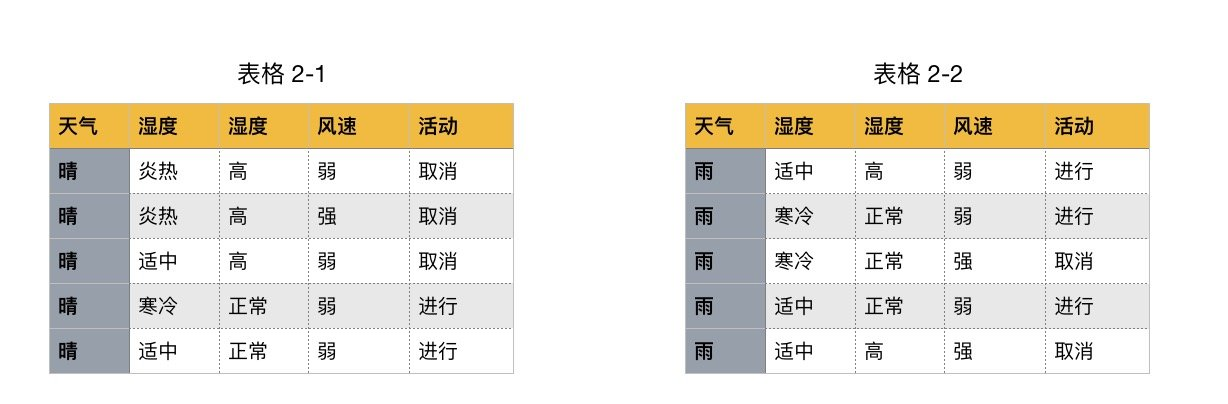
在子结点当中重复过程，直到所有的叶子结点足够"纯"。

现在我们来总结一下C4.5的算法流程:
```
while(当前节点"不纯")：
    1.计算当前节点的类别熵(以类别取值计算)
    2.计算当前阶段的属性熵(按照属性取值吓得类别取值计算)
    3.计算信息增益
    4.计算各个属性的分裂信息度量
    5.计算各个属性的信息增益率
end while
当前阶段设置为叶子节点
```

### 为什么使用C4.5要好
1. 用信息增益率来选择属性

    克服了用信息增益来选择属性时偏向选择值多的属性的不足。

2. 采用了一种后剪枝方法

    避免树的高度无节制的增长，避免过度拟合数据

3. 对于缺失值的处理

    在某些情况下，可供使用的数据可能缺少某些属性的值。假如〈x，c(x)〉是样本集S中的一个训练实例，但是其属性A的值A(x)未知。

    处理缺少属性值的一种策略是赋给它结点n所对应的训练实例中该属性的最常见值；

    另外一种更复杂的策略是为A的每个可能值赋予一个概率。

    例如，给定一个布尔属性A，如果结点n包含6个已知A=1和4个A=0的实例，那么A(x)=1的概率是0.6，而A(x)=0的概率是0.4。于是，实例x的60%被分配到A=1的分支,40%被分配到另一个分支。

    C4.5就是使用这种方法处理缺少的属性值。

## 基尼值和基尼指数
CART 决策树 [Breiman et al., 1984] 使用"基尼指数" (Gini index)来选择划分属性.

    CART 是Classification and Regression Tree的简称，这是一种著名的决策树学习算法,分类和回归任务都可用

**基尼值Gini（D）**：从数据集D中随机抽取两个样本，其类别标记不一致的概率。故，**Gini（D）值越小，数据集D的纯度越高**。

数据集 D 的纯度可用基尼值来度量:

$$Gini(D)=\sum_{k=1}^{|y|}\sum_{k\neq k}p_kp_k=1-\sum_{k=1}^{|y|}p_k^2$$

$p_k=\frac{C^k}D$,D为样本的所有数量，$c^K$为第k类样本的数量。

**基尼指数Gini_index（D）**：一般，选择使划分后基尼系数最小的属性作为最优化分属性。
$$Gini\_index(D,a)=\sum_{v=1}^{V}\frac{D^{v}}{D}Gini(D^{v})$$

### 案例
请根据下图列表，按照基尼指数的划分依据，做出决策树。
| 序号 | 是否有房 | 婚姻状况 | 年收入 | 是否拖欠贷款 |
|------|---------|----------|--------|--------------|
| 1    | yes     | single   | 125k   | no           |
| 2    | no      | married  | 100k   | no           |
| 3    | no      | single   | 70k    | no           |
| 4    | yes     | married  | 120k   | no           |
| 5    | no      | divorced | 95k    | yes          |
| 6    | no      | married  | 60k    | no           |
| 7    | yes     | divorced | 220k   | no           |
| 8    | no      | single   | 85k    | yes          |
| 9    | no      | married  | 75k    | no           |
| 10   | no      | single   | 90k    | yes          |

1.  对数据集非序列标号属性{是否有房，婚姻状况，年收入}分别计算它们的Gini指数，取Gini指数最小的属性作为决策树的根节点属性。

    第一次大循环

2. 根节点的Gini值为：

$$Gini(\text{是否拖欠货款})=1-(\frac3{10})^2-(\frac7{10})^2=0.42$$

3. 当根据是否有房来进行划分时，Gini指数计算过程为：

    $$\begin{aligned}
Gini(\pm 子节点)=& 1-(\frac{0}{3})^{2}-(\frac{3}{3})^{2}=0  \\
Gini(\text{右子节点})=& 1-(\frac{3}{7})^{2}-(\frac{4}{7})^{2}=0.4898  \\
Gini\_index(D,\text{是否有房})=& \frac{7}{10}*0.4898+\frac{3}{10}*0=0.343 
\end{aligned}$$

    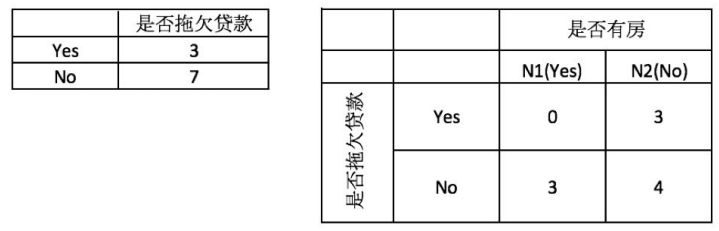

4. 若按婚姻状况属性来划分，属性婚姻状况有三个可能的取值{married，single，divorced}，分别计算划分后的Gini系数增益。

- 分组为{married} | {single,divorced}时：
    $$Gini\_index(D,\text{婚姻状况})=\frac4{10}*0+\frac6{10}*[1-(\frac36)^2-(\frac36)^2]=0.3$$
- 分组为{single} | {married,divorced}时：  
    $$Gini\_index(D,\text{婚姻状况})=\frac4{10}*0.5+\frac6{10}*[1-(\frac16)^2-(\frac56)^2]=0.367$$
- 分组为{divorced} | {single,married}时：
    $$Gini\_index(D,\text{婚姻状況})=\frac2{10}*0.5+\frac8{10}*[1-(\frac28)^2-(\frac68)^2]=0.4$$
    
对比计算结果，根据婚姻状况属性来划分根节点时取Gini指数最小的分组作为划分结果，即:

{married} | {single,divorced}

5. 同理可得年收入Gini：
对于年收入属性为数值型属性，首先需要对数据按升序排序，然后从小到大依次用相邻值的中间值作为分隔将样本划分为两组。例如当面对年收入为60和70这两个值时，我们算得其中间值为65。以中间值65作为分割点求出Gini指数。
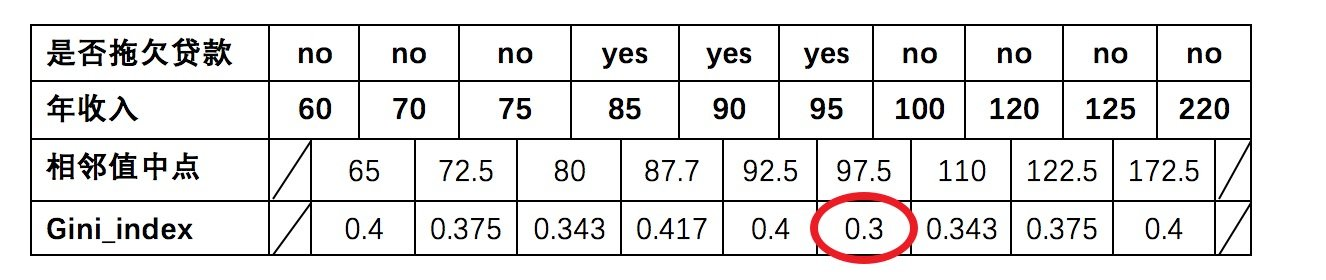
$$\text{节点为65时}:\{\text{年收入}\}=\frac{1}{10}*0-\frac{9}{10}*[1-(\frac{6}{9})^2-(\frac{3}{9})^2]=0.4$$
根据计算知道，三个属性划分根节点的指数最小的有两个：年收入属性和婚姻状况，他们的指数都为0.3。此时，选取首先出现的属性【married】作为第一次划分。

    第二次大循环
    
6. 接下来，采用同样的方法，分别计算剩下属性，其中根节点的Gini系数为（此时是否拖欠贷款的各有3个records）
    $$Gini(\text{是否拖欠贷款})=1-(\frac{3}{6})^2-(\frac{3}{6})^2=0.5$$

7. 对于是否有房属性，可得：
    $$Gini\_index(D,\text{是否有房})=\frac{2}{6}*0+\frac{4}{6}*[1-(\frac{3}{4})^2-(\frac{1}{4})^2]=0.25$$
    
8. 对于年收入属性则有：
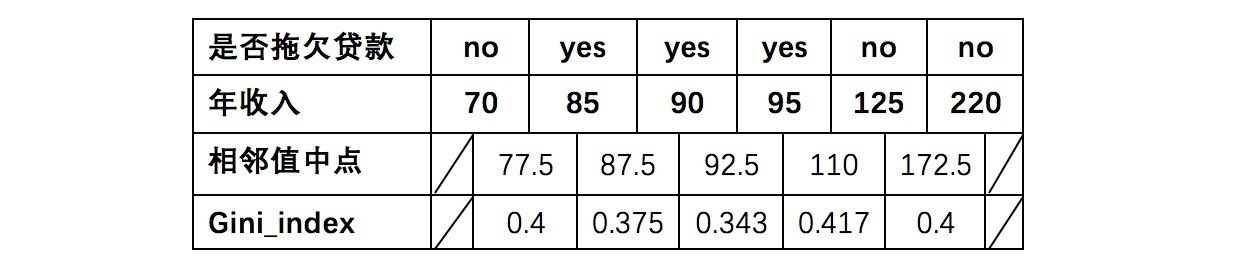

经过如上流程，构建的决策树，如下图：
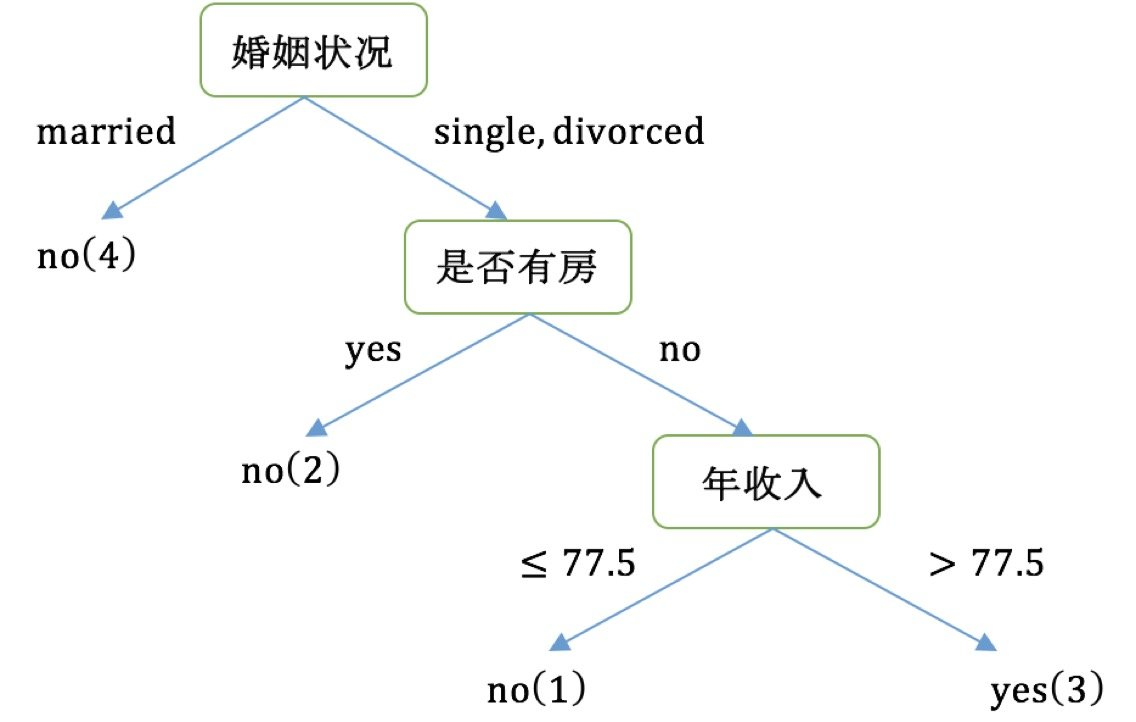

现在我们来总结一下CART的算法流程
```
while(当前节点"不纯")：
    1.遍历每个变量的每一种分割方式，找到最好的分割点
    2.分割成两个节点N1和N2
end while
每个节点足够“纯”为止
```

## 常见决策树的启发函数比较
### 信息熵
$$Ent(D)=-\sum_{k=1}^np_klog_2p_k$$

### 信息增益--ID3决策树
$$Gain(D,a)=Ent(D)-Ent(D|a)=Ent(D)-\sum_{v=1}^{V}\frac{D^v}DEnt(D^v)$$

### 信息增益率--C4.5决策树
$$Gain\_ratio(D,a)=\frac{Gain(D,a)}{IV(a)}$$

### 基尼值
$$Gini(D)=\sum_{k=1}^{|y|}\sum_{k\neq k}p_kp_{k^{\prime}}=1-\sum_{k=1}^{|y|}p_k^2$$

### 基尼指数--CART 决策树
$$Gini\_index(D,a)=\sum_{v=1}^{V}\frac{D^{v}}DGini(D^{v})$$

| 名称  | 提出时间 | 分支方式  | 备注                                                    |
| ----- | -------- | --------- | ------------------------------------------------------- |
| ID3   | 1975     | 信息增益  | ID3只能对离散属性的数据集构成决策树                        |
| C4.5  | 1993     | 信息增益率 | 优化后解决了ID3分支过程中总喜欢偏向选择值较多的属性      |
| CART  | 1984     | Gini系数  | 可以进行分类和回归，可以处理离散属性，也可以处理连续属性 |

### ID3 算法
存在的缺点
- ID3算法在选择根节点和各内部节点中的分支属性时，**采用信息增益作为评价标准**。信息增益的缺点是倾向于选择取值较多的属性，在有些情况下这类属性可能不会提供太多有价值的信息.
- ID3算法**只能对描述属性为离散型属性的数据集构造决策树**。

### C4.5算法
- 做出的改进(为什么使用C4.5要好)
    - 用信息增益率来选择属性
    - 可以处理连续数值型属性
    - 采用了一种后剪枝方法
    - 对于缺失值的处理
- C4.5算法的优缺点
    - 优点：
        - 产生的分类规则易于理解，准确率较高。
    - 缺点：
        - 在构造树的过程中，需要对数据集进行多次的顺序扫描和排序，因而导致算法的低效。
        - 此外，C4.5只适合于能够驻留于内存的数据集，当训练集大得无法在内存容纳时程序无法运行。

### CART算法
- CART算法相比C4.5算法的分类方法，采用了简化的二叉树模型，同时特征选择采用了近似的基尼系数来简化计算。
- **C4.5不一定是二叉树，但CART一定是二叉树**。

### 多变量决策树(multi-variate decision tree)
同时，无论是ID3, C4.5还是CART,在做特征选择的时候都是选择最优的一个特征来做分类决策，但是大多数，**分类决策不应该是由某一个特征决定的，而是应该由一组特征决定的**。这样决策得到的决策树更加准确。这个决策树叫做多变量决策树(multi-variate decision tree)。在选择最优特征的时候，多变量决策树不是选择某一个最优特征，而是选择最优的一个特征线性组合来做决策。这个算法的代表是OC1，这里不多介绍。

如果样本发生一点点的改动，就会导致树结构的剧烈改变。这个可以通过集成学习里面的随机森林之类的方法解决。

## 决策树变量的两种类型：
- 数字型（Numeric）：变量类型是整数或浮点数，如前面例子中的“年收入”。用“>=”，“>”,“<”或“<=”作为分割条件（排序后，利用已有的分割情况，可以优化分割算法的时间复杂度）。
- 名称型（Nominal）：类似编程语言中的枚举类型，变量只能从有限的选项中选取，比如前面例子中的“婚姻情况”，只能是“单身”，“已婚”或“离婚”，使用“=”来分割。

## 如何评估分割点的好坏？
如果一个分割点可以将当前的所有节点分为两类，使得每一类都很“纯”，也就是同一类的记录较多，那么就是一个好分割点。

比如上面的例子，“拥有房产”，可以将记录分成了两类，“是”的节点全部都可以偿还债务，非常“纯”；“否”的节点，可以偿还贷款和无法偿还贷款的人都有，不是很“纯”，但是两个节点加起来的纯度之和与原始节点的纯度之差最大，所以按照这种方法分割。

构建决策树采用贪心算法，只考虑当前纯度差最大的情况作为分割点。

## cart剪枝
### 为什么要剪枝
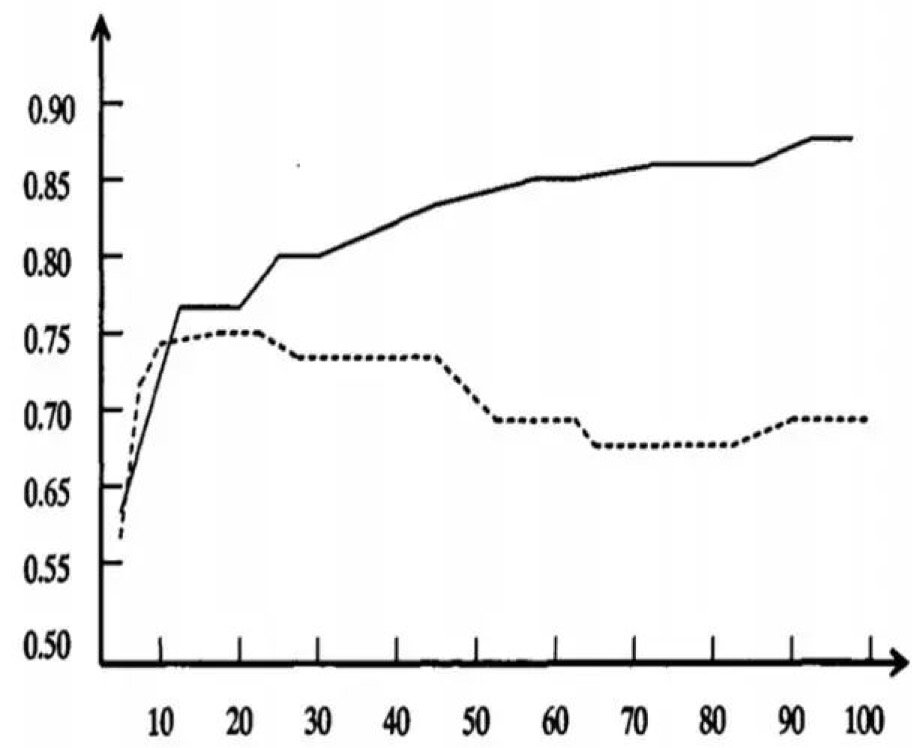
- 图形描述
    - 横轴表示在决策树创建过程中树的结点总数，纵轴表示决策树的预测精度。
    - 实线显示的是决策树在训练集上的精度，虚线显示的则是在一个独立的测试集上测量出来的精度。
    - 随着树的增长，在训练样集上的精度是单调上升的， 然而在独立的测试样例上测出的精度先上升后下降。
- 出现这种情况的原因：
    - 原因1：噪声、样本冲突，即错误的样本数据。
    - 原因2：特征即属性不能完全作为分类标准。
    - 原因3：巧合的规律性，数据量不够大。
    
### 常用的减枝方法
#### 预剪枝
- 每一个结点所包含的最小样本数目，例如10，则该结点总样本数小于10时，则不再分；
- 指定树的高度或者深度，例如树的最大深度为4；
- 指定结点的熵小于某个值，不再划分。随着树的增长， 在训练样集上的精度是单调上升的， 然而在独立的测试样例上测出的精度先上升后下降。
#### 后剪枝：
后剪枝，在已生成过拟合决策树上进行剪枝，可以得到简化版的剪枝决策树。

## 特征工程-特征提取
**将任意数据（如文本或图像）转换为可用于机器学习的数字特征**

    注：特征值化是为了计算机更好的去理解数据

- 特征提取分类:
    - 字典特征提取(特征离散化)
    - 文本特征提取
    - 图像特征提取（深度学习将介绍）

### 字典特征提取
作用：对字典数据进行特征值化。
#### sklearn.feature_extraction.DictVectorizer()

```python
sklearn.feature_extraction.DictVectorizer(*, dtype=<class 'numpy.float64'>, separator='=', sparse=True, sort=True)
```

`sklearn.feature_extraction.DictVectorizer()`函数<font color=blue>将字典列表转换为特征矩阵。</font>

- 参数说明：

    - `dtype`: 数据类型，可选参数，默认为 `numpy.float64`。指定返回数组的数据类型。
    - `separator`: 字符串，可选参数，默认为 '='。指定字典的键值对之间的分隔符。
    - `sparse`: 布尔型，可选参数，默认为 True。指定是否返回稀疏矩阵。如果为 True，则返回稀疏矩阵；否则返回密集矩阵。
    - `sort`: 布尔型，可选参数，默认为 True。指定对特征进行排序。
    
- 返回值：

    返回特征矩阵。
    
- 参考链接：

    官方文档：[sklearn.feature_extraction.DictVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html)

- DictVectorizer.fit_transform(X)
    - X:字典或者包含字典的迭代器返回值
    - 返回sparse矩阵
- DictVectorizer.get_feature_names() 返回类别名称
##### 流程分析
- 实例化类DictVectorizer
- 调用fit_transform方法输入数据并转换（注意返回格式）

#### DictVectorizer.fit_transform(X)

```python
DictVectorizer.fit_transform(X)
```

`DictVectorizer.fit_transform()`函数<font color=blue>将字典列表转换为特征矩阵。</font>

- 参数说明：

    - `X`: 字典列表，要进行转换的数据。
    
- 返回值：

    返回特征矩阵。
    
- 参考链接：

    官方文档：[sklearn.feature_extraction.DictVectorizer.fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer.fit_transform)
    
    
#### DictVectorizer.get_feature_names()

```python
DictVectorizer.get_feature_names_out()
```

`DictVectorizer.get_feature_names_out()`函数<font color=blue>返回特征矩阵中的特征名称列表。</font>

- 返回值：

    返回特征名称列表。
    
- 参考链接：

    官方文档：[sklearn.feature_extraction.DictVectorizer.get_feature_names_out](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer.get_feature_names)

In [7]:
from sklearn.feature_extraction import DictVectorizer

def dict_demo():
    """
    对字典类型的数据进行特征抽取
    :return: None
    """
    data = [{'city': '北京', 'temperature': 100}, {'city': '上海', 'temperature': 60}, {'city': '深圳', 'temperature': 30}]
    # 1、实例化一个转换器类
    transfer = DictVectorizer(sparse=False)
    # 2、调用fit_transform
    data = transfer.fit_transform(data)
    print("返回的结果:\n", data)
    # 打印特征名字
    print("特征名字：\n", transfer.get_feature_names_out())

    return None

dict_demo()

返回的结果:
 [[  0.   1.   0. 100.]
 [  1.   0.   0.  60.]
 [  0.   0.   1.  30.]]
特征名字：
 ['city=上海' 'city=北京' 'city=深圳' 'temperature']


#### 总结
对于特征当中存在类别信息的我们都会做one-hot编码处理

### 文本特征提取
作用：对文本数据进行特征值化

#### sklearn.feature_extraction.text.CountVectorizer()

```python
class sklearn.feature_extraction.text.CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
```

`sklearn.feature_extraction.text.CountVectorizer()`函数<font color=blue>将文本文档转换为词频矩阵。</font>

- 参数说明：

    - `input` : 可以是文件、文件路径或文件流等。
    - `encoding` : 编码方式，默认为 'utf-8'。
    - `decode_error` : 指定错误的处理方式，默认为 'strict'。
    - `strip_accents` : 将会把 accented characters 去掉，例如 é -> e。
    - `lowercase` : 转换为小写。
    - `preprocessor` : 在执行 tokenizing 和 stopword 之前预处理字符串。
    - `tokenizer` : 指定分词函数。
    - `stop_words` : 停用词，字符串 'english' 表示使用内置的英文停用词，None 表示不使用。
    - `token_pattern` : 正则表达式，用来描述 tokens 的规则。
    - `ngram_range` : n-gram 的范围，例如 (1, 1) 表示 unigram。
    - `analyzer` : 表示 split 文本的方式，可以是 'word' 或 'char'。
    - `max_df` : 单词在多少文档中最多出现，如果超过了这个值，就认为这个单词是无用的。
    - `min_df` : 单词在多少文档中最少出现，如果没有达到这个值，就认为这个单词是无用的。
    - `max_features` : 最多提取的特征数。
    - `vocabulary` : 指定词汇表。
    - `binary` : 如果为 True，则所有非零计数都设置为1，否则，计数仍然是原始计数。
    - `dtype` : 特征矩阵的数据类型，默认为 `numpy.int64`。

- 返回值：

    返回一个词频矩阵。
    
- 参考链接：

    官方文档：[sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
    
##### 流程分析
- 实例化类CountVectorizer
- 调用fit_transform方法输入数据并转换 （注意返回格式，利用toarray()进行sparse矩阵转换array数组）

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def text_count_demo():
    """
    对文本进行特征抽取，countvetorizer
    :return: None
    """
    data = ["life is short,i like like python", "life is too long,i dislike python"]
    # 1、实例化一个转换器类
    # transfer = CountVectorizer(sparse=False) # 注意,没有sparse这个参数
    transfer = CountVectorizer()
    # 2、调用fit_transform
    data = transfer.fit_transform(data)
    print("文本特征抽取的结果：\n", data.toarray())
    print("返回特征名字：\n", transfer.get_feature_names_out())

    return None

text_count_demo()

文本特征抽取的结果：
 [[0 1 1 2 0 1 1 0]
 [1 1 1 0 1 1 0 1]]
返回特征名字：
 ['dislike' 'is' 'life' 'like' 'long' 'python' 'short' 'too']


**不支持单个中文字!**

In [20]:
# 文档迎行特征值化
# 导入包 
from sklearn.feature_extraction.text import CountVectorizer

# 实例化
vector = CountVectorizer()

# fit_transform
res= vector.fit_transform(["人生 苦短，我喜 欢Py thon","生活太 长久，我不喜欢 Python"])
print(vector.get_feature_names_out())
print(res.toarray())

['python' 'thon' '人生' '我不喜欢' '我喜' '欢py' '生活太' '苦短' '长久']
[[0 1 1 0 1 1 0 1 0]
 [1 0 0 1 0 0 1 0 1]]


### jieba分词处理
#### jieba.cut()

```python
jieba.cut(sentence, cut_all=False, HMM=True)
```

`jieba.cut()`函数<font color=blue>实现了中文分词</font>，可以将中文句子分割成一个个单独的词语。

- 参数说明：

    - `sentence` : 待分割的中文句子。
    - `cut_all` : 是否采用全模式分割，默认为 False。
    - `HMM` : 是否使用 HMM 模型，默认为 True。

- 返回值：

    返回一个可迭代的生成器，每个元素为分出来的一个词语。
    
- 参考链接：

    官方文档：[jieba.cut](https://github.com/fxsjy/jieba/blob/master/README.md)

In [1]:
import jieba

text = '中文分词是文本处理不可或缺的一步！'
words = jieba.cut(text)
print(list(words))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jie\AppData\Local\Temp\jieba.cache
Loading model cost 1.169 seconds.
Prefix dict has been built successfully.


['中文', '分词', '是', '文本处理', '不可或缺', '的', '一步', '！']


##### 案例分析
对以下三句话进行特征值化
```
今天很残酷，明天更残酷，后天很美好，
但绝对大部分是死在明天晚上，所以每个人不要放弃今天。

我们看到的从很远星系来的光是在几百万年之前发出的，
这样当我们看到宇宙时，我们是在看它的过去。

如果只用一种方式了解某样事物，你就不会真正了解它。
了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。
```
分析
- 准备句子，利用jieba.cut进行分词
- 实例化CountVectorizer
- 将分词结果变成字符串当作fit_transform的输入值

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba

def cut_word(text):
    """
    对中文进行分词
    "我爱北京天安门"————>"我 爱 北京 天安门"
    :param text:
    :return: text
    """
    # 用结巴对中文字符串进行分词
    text = " ".join(list(jieba.cut(text)))

    return text

def text_chinese_count_demo2():
    """
    对中文进行特征抽取
    :return: None
    """
    data = ["一种还是一种今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。",
            "我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
            "如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]
    # 将原始数据转换成分好词的形式
    text_list = []
    for sent in data:
        text_list.append(cut_word(sent))
    print(text_list)

    # 1、实例化一个转换器类
    # transfer = CountVectorizer(sparse=False)
    transfer = CountVectorizer()
    # 2、调用fit_transform
    data = transfer.fit_transform(text_list)
    print("文本特征抽取的结果：\n", data.toarray())
    print("返回特征名字：\n", transfer.get_feature_names_out())

    return None

text_chinese_count_demo2()

['一种 还是 一种 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。', '我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。', '如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。']
文本特征抽取的结果：
 [[2 0 1 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 0 0 1 1 0 0 1
  0]
 [0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 3 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0
  1]
 [1 1 0 0 4 3 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 2 1 0 0 1 0 0
  0]]
返回特征名字：
 ['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '星系' '晚上' '某样' '残酷' '每个'
 '看到' '真正' '秘密' '绝对' '美好' '联系' '过去' '还是' '这样']


### Tf-idf文本特征提取
- TF-IDF的主要思想是：如果**某个词或短语在一篇文章中出现的概率高，并且在其他文章中很少出现**，则认为此词或者短语具有很好的类别区分能力，适合用来分类。
- TF-IDF作用：**用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度**。

#### 公式
- 词频（term frequency，tf）指的是某一个给定的词语在该文件中出现的频率
- 逆向文档频率（inverse document frequency，idf）是一个词语普遍重要性的度量。某一特定词语的idf，可以**由总文件数目除以包含该词语之文件的数目，再将得到的商取以10为底的对数得到**
$$\mathrm{tfidf_{i,j}=tf_{i,j}\times idf_i}$$

最终得出结果可以理解为重要程度。
```
举例：
假如一篇文章的总词语数是100个，而词语"非常"出现了5次，那么"非常"一词在该文件中的词频就是5/100=0.05。
而计算文件频率（IDF）的方法是以文件集的文件总数，除以出现"非常"一词的文件数。
所以，如果"非常"一词在1,0000份文件出现过，而文件总数是10,000,000份的话，
其逆向文件频率就是lg（10,000,000 / 1,0000）=3。
最后"非常"对于这篇文档的tf-idf的分数为0.05 * 3=0.15
```

#### sklearn.feature_extraction.text.TfidfVectorizer()

```python
class sklearn.feature_extraction.text.TfidfVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
```

`sklearn.feature_extraction.text.TfidfVectorizer()`函数<font color=blue>将文本文档转换为基于TF-IDF的特征矩阵。</font>

- 参数说明：

    - `input` : 可以是文件、文件路径或文件流等。
    - `encoding` : 编码方式，默认为 'utf-8'。
    - `decode_error` : 指定错误的处理方式，默认为 'strict'。
    - `strip_accents` : 将会把 accented characters 去掉，例如 é -> e。
    - `lowercase` : 转换为小写。
    - `preprocessor` : 在执行 tokenizing 和 stopword 之前预处理字符串。
    - `tokenizer` : 指定分词函数。
    - `analyzer` : 表示 split 文本的方式，可以是 'word' 或 'char'。
    - `stop_words` : 停用词，字符串 'english' 表示使用内置的英文停用词，None 表示不使用。
    - `token_pattern` : 正则表达式，用来描述 tokens 的规则。
    - `ngram_range` : n-gram 的范围，例如 (1, 1) 表示 unigram。
    - `max_df` : 单词在多少文档中最多出现，如果超过了这个值，就认为这个单词是无用的。
    - `min_df` : 单词在多少文档中最少出现，如果没有达到这个值，就认为这个单词是无用的。
    - `max_features` : 最多提取的特征数。
    - `vocabulary` : 指定词汇表。
    - `binary` : 如果为 True，则所有非零计数都设置为1，否则，计数仍然是原始计数。
    - `dtype` : 特征矩阵的数据类型，默认为 `numpy.float64`。
    - `norm` : 规范化向量的方式，可以是 'l1'、'l2' 或 None。
    - `use_idf` : 是否使用 IDF。
    - `smooth_idf` : 是否对 IDF 进行平滑处理。
    - `sublinear_tf` : 是否对 TF 进行 sublinear 缩放。

- 返回值：

    返回一个基于TF-IDF的特征矩阵。
    
- 参考链接：

    官方文档：[sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

#### 案例

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import jieba

def cut_word(text):
    """
    对中文进行分词
    "我爱北京天安门"————>"我 爱 北京 天安门"
    :param text:
    :return: text
    """
    # 用结巴对中文字符串进行分词
    text = " ".join(list(jieba.cut(text)))

    return text

def text_chinese_tfidf_demo():
    """
    对中文进行特征抽取
    :return: None
    """
    data = ["一种还是一种今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。",
            "我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
            "如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]
    # 将原始数据转换成分好词的形式
    text_list = []
    for sent in data:
        text_list.append(cut_word(sent))
    print(text_list)

    # 1、实例化一个转换器类
    # transfer = CountVectorizer(sparse=False)
    transfer = TfidfVectorizer(stop_words=['一种', '不会', '不要'])
    # 2、调用fit_transform
    data = transfer.fit_transform(text_list)
    print("文本特征抽取的结果：\n", data.toarray())
    print("返回特征名字：\n", transfer.get_feature_names_out())

    return None

text_chinese_tfidf_demo()

['一种 还是 一种 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。', '我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。', '如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。']
文本特征抽取的结果：
 [[0.         0.         0.         0.43643578 0.         0.
  0.         0.         0.         0.21821789 0.         0.21821789
  0.         0.         0.         0.         0.21821789 0.21821789
  0.         0.43643578 0.         0.21821789 0.         0.43643578
  0.21821789 0.         0.         0.         0.21821789 0.21821789
  0.         0.         0.21821789 0.        ]
 [0.2410822  0.         0.         0.         0.2410822  0.2410822
  0.2410822  0.         0.         0.         0.         0.
  0.         0.         0.2410822  0.55004769 0.         0.
  0.         0.         0.2410822  0.         0.         0.
  0.         0.48216441 0.         0.         0.         0.
  0.         0.2410822  0.         0.2410822 

### Tf-idf的重要性
分类机器学习算法进行文章分类中前期数据处理方式

## 案例：泰坦尼克号乘客生存预测
### 案例背景
泰坦尼克号沉没是历史上最臭名昭着的沉船之一。1912年4月15日，在她的处女航中，泰坦尼克号在与冰山相撞后沉没，在2224名乘客和机组人员中造成1502人死亡。这场耸人听闻的悲剧震惊了国际社会，并为船舶制定了更好的安全规定。 造成海难失事的原因之一是乘客和机组人员没有足够的救生艇。尽管幸存下沉有一些运气因素，但有些人比其他人更容易生存，例如妇女，儿童和上流社会。 在这个案例中，我们要求您完成对哪些人可能存活的分析。特别是，我们要求您运用机器学习工具来预测哪些乘客幸免于悲剧。

案例：https://www.kaggle.com/c/titanic/overview

我们提取到的数据集中的特征包括票的类别，是否存活，乘坐班次，年龄，登陆home.dest，房间，船和性别等。

数据：http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt

经过观察数据得到:
1. 乘坐班是指乘客班（1，2，3），是社会经济阶层的代表。
2. 其中age数据存在缺失。

### 步骤分析
- 1.获取数据
- 2.数据基本处理
- 2.1 确定特征值,目标值
- 2.2 缺失值处理
- 2.3 数据集划分
- 3.特征工程(字典特征抽取)
- 4.机器学习(决策树)
- 5.模型评估

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#### 1.获取数据

In [35]:
data_train = pd.read_csv("./datasets/train.csv")
data_test = pd.read_csv("./datasets/test.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##### 1.1数据分析

In [36]:
data_train.shape, data_test.shape, data_train.columns

((891, 12),
 (418, 11),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

可以看到训练集总共有12列891行数据，其中Survived字段表示的是乘客是否获救，其余都是乘客个人信息，包括：
- Survived --- 获救情况（二分类，因变量）
- PassengerId --- 乘客ID
- Pclass --- 乘客等级(1/2/3等舱位)
- Name --- 乘客姓名
- Sex --- 性别
- Age --- 年龄
- SibSp --- 堂兄弟/妹个数
- Parch --- 父母与小孩个数
- Ticket --- 船票信息
- Fare --- 票价
- Cabin --- 客舱
- Embarked --- 登船港口

##### 1.2简单描述性分析

In [37]:
data_train.info() # 看一下数据类型及缺失情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


数据显示，训练数据集中共有891名乘客，12列特征，其中有三列数据存在缺失：
- Age(年龄)：只有714条完整记录，有177条记录缺失；
- Cabin(客舱)：只有204条乘客已知，有687条记录缺失，缺失较多！；
- Embarked(登船港口)：只有两条记录缺失；

In [38]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


根据表格，我们可以得出一些基本信息：
- Survived：大概有0.383838比例的人最后获救了；
- Pclass: 2号和3号舱的人要比1号舱的人多；
- Age：所有乘客的平均年龄大概再29.7岁，最小的乘客0.42岁，最大的乘客80岁；
- Fare：平均票价在32元，最高的票价在512元；
- ....

In [39]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


训练集和测试集大致的分布相差不大；

#### 2.数据基本处理
##### 2.1 确定特征值,目标值

In [27]:
x_train = titan_train[['Pclass', 'Age', 'Sex']].copy()
y_train = titan_train['Survived']
x_test = titan_train[['Pclass', 'Age', 'Sex']].copy()
y_test = titan_train['Survived']

```python
C:\Users\jie\AppData\Local\Temp\ipykernel_1156\1355910646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.loc[:, 'Age'].fillna(x_train['Age'].mean(), inplace=True)
```

要解决这个警告，可以使用`.copy()`方法创建一个切片的副本，然后对副本进行赋值操作。这样可以确保不对原始DataFrame产生任何副作用。

请尝试以下修改：

```python
import pandas as pd

# 假设您已经将数据集加载到 'titan_train' DataFrame 中
# 示例：
# titan_train = pd.read_csv('your_dataset.csv')

x_train = titan_train[['Pclass', 'Age', 'Sex']].copy()  # 创建副本
y_train = titan_train['Survived']

# 对副本进行填充操作
x_train['Age'].fillna(x_train['Age'].mean(), inplace=True)
```

通过使用`.copy()`方法，我们创建了切片的副本，然后对副本进行填充操作，避免了警告信息。

请确保在填充缺失值之前，已经正确加载了数据，并且`x_train['Age']`列中确实包含缺失值。

##### 2.2 缺失值处理
缺失值需要处理，将特征当中有类别的这些特征进行字典特征抽取

In [28]:
x_train.loc[:, 'Age'].fillna(x_train['Age'].mean(), inplace=True)
y_train.loc[:, 'Age'].fillna(y_train['Age'].mean(), inplace=True)

IndexingError: Too many indexers